# Descomposición de una onda estacionaria en propagantes

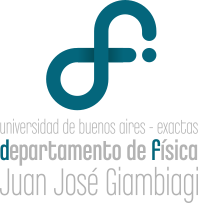  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado

Una cuerda de longitud $L = 0.6\,\mathrm{m}$, fija en sus dos extremos, oscila en uno de sus modos normales.
La velocidad de propagación de las ondas en dicha cuerda es \\(v = 80\,\mathrm{m\,s^{-1}}\\).
En el momento que presenta su máxima amplitud pico a pico ésta es de \\(8\,\mathrm{mm}\\).  
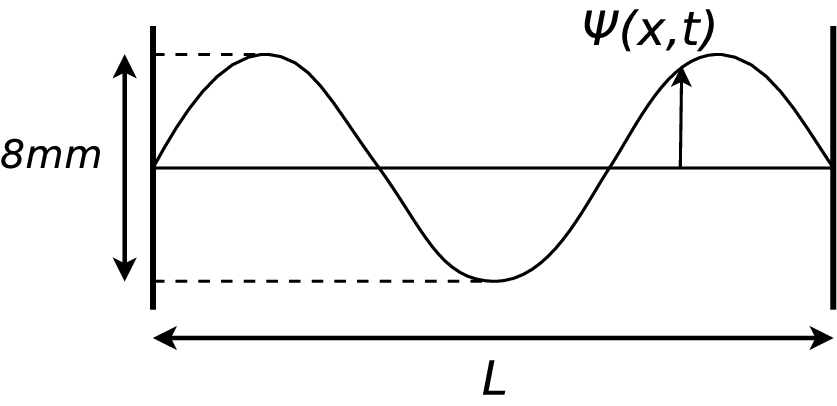

1. Escribir $\psi(x,t)$, sabiendo que $\psi(x,0) = 0\;\forall x$, y que $\dot{\psi}(L/2,0) > 0$.
1. Hallar ondas propagantes $\psi_\mathrm{derecha}$ y \\(\psi_\mathrm{izquierda}\\) tales que $\psi(x,t)$ sea una combinación lineal de éstas.

## Escribir $\psi(x,t)$

### Modos normales de una cuerda con extremos fijos

Sabemos que la solución general para cada modo \\((p)\\) es

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
B_p = sym.Symbol(r'B^{(p)}')
C_p = sym.Symbol(r'C^{(p)}')
omega_p = sym.Symbol('\omega^{(p)}')
k_p = sym.Symbol('k^{(p)}')
phi_p = sym.Symbol('\phi^{(p)}')

t = sym.Symbol('t')
x = sym.Symbol('x')
psi_p = sym.Function('\psi^{(p)}')(x,t)
psi_modo = sym.Eq(psi_p,
                     (B_p* sym.sin(k_p* x) + C_p* sym.cos(k_p* x) )*  sym.cos(omega_p* t + phi_p) )
psi_modo

#### Extremo fijo en $x= 0$

In [3]:
psi_z0 = psi_modo.subs(x, 0)
psi_z0

al ser un extremo fijo

In [4]:
psi_z0 = psi_z0.subs(psi_z0.lhs, 0)
psi_z0

Se cumple con

In [5]:
parteTemporal = psi_z0.args[1].args[1]
C_p = psi_z0.args[1].args[0]
C_p_z0 = sym.Eq(C_p, sym.solve(psi_z0.rhs/ parteTemporal, C_p)[0] )
C_p_z0

Así

In [6]:
psi_gauche = psi_modo.subs(C_p_z0.lhs, C_p_z0.rhs)
psi_gauche

#### Extremo fijo en \\(x= L\\)

In [7]:
L = sym.Symbol('L', positive= True)
psi_zL = psi_gauche.subs(x, L)
psi_zL

siendo también un extremo fijo

In [8]:
psi_zL = psi_zL.subs(psi_zL.lhs, 0)
psi_zL

establece los valores que puede tomar el número de onda

In [9]:
parteEspacial = psi_zL.rhs.args[2]
k_p = parteEspacial.args[0].args[0]
k_p_zL = sym.Eq(k_p, sym.solveset(parteEspacial, k_p), evaluate= False)
k_p_zL

Esto se resume en

In [10]:
k_p_droit = sym.Eq(k_p_zL.lhs, k_p_zL.rhs.args[0].args[0].args[1]/2)
k_p_droit

Con la relación de dispersión

In [11]:
v = sym.Symbol('v')
relaciónDispersión = sym.Eq(omega_p, v* k_p)
relaciónDispersión

ya puede escribirse la solución para un modo \\(p\\) de este sistema

In [12]:
psi_sistema_substituciones = {
    relaciónDispersión.lhs : relaciónDispersión.rhs,
    C_p_z0.lhs : C_p_z0.rhs,
    k_p_droit.lhs : k_p_droit.rhs,
}
psi_sistema = psi_modo.subs(psi_sistema_substituciones)
psi_sistema

### Condiciones iniciales

#### Identificando el modo en el dibujo

En el dibujo es claro que la **onda estacionaria** se puede representar con un **único armónico**, i.e. una única función trigonométrica.

Analizando que sucede dentro de la longitud \\(L\\) de la cuerda en la figura se puede determinar el modo representado por dos procedimientos equivalentes.
- Midiendo la $\lambda^{(p)}$.
Es fácil ver que hay **una y media** \\(\lambda^{(p)}\\) dentro de \\(L\\) 
$$
\begin{aligned}
    \frac{3}{2} \lambda^{(p)} &= L \\
    \frac{2 \pi}{k^{(p)}} &= \frac{2 L}{3} \\
    k^{(p)} &= 2 \pi \frac{3}{2 L} \\
    \frac{p \pi}{L} &= \pi \frac{3}{L} \\
    p &= 3 \\
\end{aligned}
$$
- Contando nodos.
Los nodos son puntos donde se anula la función

In [13]:
psi_sistema.rhs.args[2]

ésta para el modo fundamental, \\(p=1\\), no tiene nodos.
El primer armónico, con \\(p=2\\), presentará un nodo.
Es el segundo armónico el que presenta los dos nodos que se ven en la figura y por tanto \\(p=3\\).

La expresión para este modo es

In [14]:
n = k_p_droit.rhs.args[2]
psi_p3 = psi_sistema.subs(n, 3)

#### $\psi(x,0) = 0\;\forall x$

In [15]:
psi_t0 = psi_p3.subs(t,0)
psi_t0

In [16]:
psi_t0 = psi_t0.subs(psi_t0.lhs, 0)
psi_t0

De aquí las soluciones para \\(\phi^{(p)}\\) pueden ser

In [17]:
cos_phi = psi_t0.rhs.args[1]
phi_solve = sym.solveset(psi_t0, phi_p)
phi_solve

Sabemos que con \\(n=0\\) cualquiera de estas funciona para todos los \\(p\\).

In [18]:
phi_p_1 = sym.Eq(sym.Symbol('\phi^{(p)}_1'), phi_solve.args[0].args[0](0) ) 
phi_p_2 = sym.Eq(sym.Symbol('\phi^{(p)}_2'), phi_solve.args[1].args[0](0) ) 
phi_p_1, phi_p_2

Cada una de ellas lleva a una solución distinta de la otra

In [19]:
psi_sistema_1 = psi_p3.subs(phi_p, phi_p_1.rhs, evaluate= False)
psi_p_1 = sym.Function('\psi^{(p)}_1')(x,t)
psi_sistema_1 = psi_sistema_1.subs(psi_sistema_1.lhs, psi_p_1)
psi_sistema_1

In [20]:
psi_sistema_2 = psi_p3.subs(phi_p, phi_p_2.rhs, evaluate= False)
psi_p_2 = sym.Function('\psi^{(p)}_2')(x,t)
psi_sistema_2 = psi_sistema_2.subs(psi_sistema_2.lhs, psi_p_2)
psi_sistema_2

¿Cuál de las dos elegir?

#### $\dot{\psi}(L/2,0) > 0$


Para la primer opción de la fase temporal

In [21]:
phi_p_1

In [22]:
psi_sistema_1_punto = sym.Eq(psi_sistema_1.lhs.diff(t), psi_sistema_1.rhs.diff(t) ).subs(x, L/2).subs(t,0)
psi_sistema_1_punto

⎛∂ ⎛             ⎛L   ⎞⎞⎞│      3⋅π⋅B__{(p)}⋅v
⎜──⎜\psi_1__{(p)}⎜─, t⎟⎟⎟│    = ──────────────
⎝∂t⎝             ⎝2   ⎠⎠⎠│t=0         L       

En tanto que para la segunda opción

In [23]:
phi_p_2

In [24]:
psi_sistema_2_punto = sym.Eq(psi_sistema_2.lhs.diff(t), psi_sistema_2.rhs.diff(t) ).subs(x, L/2).subs(t,0)
psi_sistema_2_punto

⎛∂ ⎛             ⎛L   ⎞⎞⎞│      -3⋅π⋅B__{(p)}⋅v 
⎜──⎜\psi_2__{(p)}⎜─, t⎟⎟⎟│    = ────────────────
⎝∂t⎝             ⎝2   ⎠⎠⎠│t=0          L        

Puesto que la amplitud debe ser positiva tenemos que la opción correcta es la primera.

Finalmente arribamos a la expresión buscada

#### Amplitud, longitud, velocidad

El enunciado informa la magnitud de la **amplitud pico a pico**.
El codominio de las funciones trigonométricas va desde $-1$ a $1$.
Por tanto la amplitud, en unidades del SI, para nuestra expresión es **la mitad** de esta

In [25]:
B_p_value= sym.Eq(B_p, 0.008/2)
B_p_value

No hay que olvidar que también tenemos la información de la longitud de la cuerda, \\(L\\), y la velocidad de fase en el sistema \\(v\\).
Con esto se puede obtener la expresión para la perturbación en función de \\(x\\) y \\(t\\).

### Expresión de la onda estacionaria

In [26]:
psi_estacionaria_substituciones = {
    B_p_value.lhs : B_p_value.rhs,
    n : 3,
    L : 0.6,
    phi_p : phi_p_1.rhs,
    v : 80.0,
}
psi_estacionaria = psi_sistema.subs(psi_estacionaria_substituciones)
psi_estacionaria

## $\psi_\mathrm{derecha}+ \psi_\mathrm{izquierda} = \psi(x,t)$

### Ondas propagantes de igual amplitud que conforman la estacionaria

Vuelvo a la solución para un modo arbitrarío \\(p\\)

In [27]:
psi_gauche

Revisando las identidades trigonométricas ya usadas
$$
\begin{aligned}
    \cos(a \pm b) &= \cos(a) \cos(b) \mp \sin(a) \sin(b) \notag \\
    \sin(a \pm b) &= \sin(a) \cos(b) \pm \cos(a) \sin(b)
\end{aligned},
$$
encontramos que en la segunda hay multiplicaciones de las funciones seno y coseno.

Podemos aislar una de estas si planteamos la suma
$$
\begin{aligned}
\frac{\sin(a + b)}{2} &+ \frac{\sin(a - b)}{2}\\
\frac{1}{2} ( ( \sin(a) \cos(b) + \cos(a) \sin(b) ) &+ ( \sin(a) \cos(b) - \cos(a) \sin(b) ) )\\
\frac{1}{2} ( ( \sin(a) \cos(b) ) &+ ( \sin(a) \cos(b) ) )\\
\sin(a) & \cos(b)\\
\end{aligned},
$$
Es decir
$$
\sin(a) \cos(b) = \frac{1}{2} \sin(a + b) + \left( \frac{1}{2} \sin(a - b) \right)
$$
En la expresión para la **onda estacionaria** identificamos

In [28]:
a = sym.Eq(sym.Symbol('a'), psi_gauche.rhs.args[2].args[0])
a

In [29]:
b= sym.Eq(sym.Symbol('b'), psi_gauche.rhs.args[1].args[0] )
b

Una **onda propagante** en la dirección \\(\hat{x}\\) puede expresarse

In [30]:
unMedio = sym.Rational(1,2)
psi_prop_distra= sym.Eq( sym.Function('\psi_\mathrm{derecha}')(x,t),
                     unMedio* psi_gauche.rhs.args[0]*  sym.sin(a.rhs - b.rhs)
                    )
psi_prop_distra

y la que se propaga en \\(-\hat{x}\\)

In [31]:
psi_prop_sinistra= sym.Eq( sym.Function('\psi_\mathrm{izquierda}')(x,t),
                     unMedio* psi_gauche.rhs.args[0]*  sym.sin(a.rhs + b.rhs)
                    )
psi_prop_sinistra

### Las propagantes que conforman la estaciona en esta cuerda

De igual manera podríamos haber procedido directamente de la expresión para la onda estacionaria de este ejercicio.

Revisando las identidades trigonométricas ya usadas
$$
\begin{aligned}
    \cos(a \pm b) &= \cos(a) \cos(b) \mp \sin(a) \sin(b) \notag \\
    \sin(a \pm b) &= \sin(a) \cos(b) \pm \cos(a) \sin(b)
\end{aligned},
$$
encontramos que en la primera de ellas hay un termino que presenta la multiplicación de funciones seno.
Podemos aislarle si planteamos
$$
\begin{aligned}
\frac{\cos(a - b)}{2} &- \frac{\cos(a + b)}{2}\\
\frac{1}{2} ( ( \cos(a) \cos(b) + \sin(a) \sin(b) ) &- ( \cos(a) \cos(b) - \sin(a) \sin(b) ) )\\
\frac{1}{2} ( ( \sin(a) \sin(b) ) &+ ( \sin(a) \sin(b) ) )\\
\sin(a) & \sin(b)\\
\end{aligned},
$$
Es decir
$$
\sin(a) \sin(b) = \frac{1}{2} \cos(a - b) + \left( -\frac{1}{2} \cos(a + b) \right)
$$
En la expresión para la **onda estacionaria** puede identificarse

In [32]:
a_estacionaria = sym.Eq(sym.Symbol('a'), psi_estacionaria.rhs.args[2].args[0])
a_estacionaria

In [33]:
b_estacionaria = sym.Eq(sym.Symbol('b'), psi_estacionaria.rhs.args[1].args[0])
b_estacionaria

con lo que puede escribirse la **onda propagante** en la dirección \\(\hat{x}\\) como

In [34]:
psi_distra= sym.Eq( sym.Function('\psi_\mathrm{derecha}')(x,t),
                   unMedio* psi_estacionaria.rhs.args[0]*  sym.cos(a_estacionaria.rhs - b_estacionaria.rhs)
                  )
psi_distra

y la que se propaga en \\(-\hat{x}\\)

In [35]:
psi_sinistra= sym.Eq( sym.Function('\psi_\mathrm{izquierda}')(x,t),
                   (-1)* unMedio* psi_estacionaria.rhs.args[0]*  sym.cos(a_estacionaria.rhs + b_estacionaria.rhs)
                  )
psi_sinistra